In [ ]:

from neuron import h

import os
current_directory = os.getcwd()
print(current_directory)
path = os.path.join(current_directory, "mechanisms", "nrnmech.dll")
print(path)
h.nrn_load_dll(path)

from neuron.units import mV,V,m,um,ms
import matplotlib.pyplot as plt
import numpy as np
h.load_file("stdrun.hoc")

1.0

In [ ]:
import HH_minimal_cells 
cell=HH_minimal_cells.Fast_Spiking(0,0,0,0,0,9)
h.topology()
for sec in cell.all:
    print(sec.nseg)



|---------|       Fast Spiking[0].soma(0-1)

9


In [3]:
h.load_file("interpxyz.hoc")
h.load_file("setpointers.hoc")
cell.soma.psection()


After any change to cell geometry or nseg, be sure to invoke setpointers()


{'point_processes': {'ExpSyn': {ExpSyn[0]}},
 'density_mechs': {'pas': {'g': [0.00015,
    0.00015,
    0.00015,
    0.00015,
    0.00015,
    0.00015,
    0.00015,
    0.00015,
    0.00015],
   'e': [-70.0, -70.0, -70.0, -70.0, -70.0, -70.0, -70.0, -70.0, -70.0],
   'i': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]},
  'extracellular': {'xraxial': [[1000000000.0, 1000000000.0],
    [1000000000.0, 1000000000.0],
    [1000000000.0, 1000000000.0],
    [1000000000.0, 1000000000.0],
    [1000000000.0, 1000000000.0],
    [1000000000.0, 1000000000.0],
    [1000000000.0, 1000000000.0],
    [1000000000.0, 1000000000.0],
    [1000000000.0, 1000000000.0]],
   'xg': [[1000000000.0, 1000000000.0],
    [1000000000.0, 1000000000.0],
    [1000000000.0, 1000000000.0],
    [1000000000.0, 1000000000.0],
    [1000000000.0, 1000000000.0],
    [1000000000.0, 1000000000.0],
    [1000000000.0, 1000000000.0],
    [1000000000.0, 1000000000.0],
    [1000000000.0, 1000000000.0]],
   'xc': [[0.0, 0.0],
    [0.0,

In [4]:
### Set rx
from calcrx import setelec,homogenous,set_uniform_field_between_plates
#setelec([50],[0],[0])
#remember V=R*I
#for 100 mV, we can do it like this 
#rx=0.001 MOhm
#is=0.1 mA
#rho=100000 #ohm cm
#factor=10
#homogenous(rho,factor)

v_plate=4000*V #- potential difference between the plates
distance=1*m #distance
field_orientation=np.array([1,0,0])#along the x axis
ref_point=[0,0,0] #reference point with a 0 e_extracellular

set_uniform_field_between_plates(v_plate,distance,field_orientation,ref_point)

In [5]:
dt=0.1
simtime=1000
#Set the waveform and amplitude for the stimulus (is)

#Set the waveform and amplitude for the stimulus (is)
import stim

#vector play method
#delay, duration, amplitude
#stim.stimplay(1, 100, 1.57263*2)
#tvec,gvec=stim.stimplay(1,100,-30,simtime)

#squarewave
#cell(just to insert the faux point process)
#cell,delay,freq,number of cycles, amp1, amp2
# fsquare=stim.squarestim(cell,1,100,200,1,-1)

#sinwave
#cell,delay, number of full cycles, frequency, amp
#sinstim(cell,ton,nc,f0,amp)
#fzap=stim.sinstim(cell,1,500,100,1)


#playsin
# ton,amp,dt,dur,simtime,freq
ton=50
amp=1000
dur=500
freq=10
times,stim1=stim.playsin(ton,amp,dt,dur,simtime,freq)



#simpleplaysin
#amp,dt,tstop,freq

# amp=100
# tstop=simtime
# freq=100
# times,stim1=stim.simpleplaysin(amp,dt,tstop,freq)

print(1)

1


In [6]:
# # Transient Time
# trans = 0000


# # setup simulation parameters
# Dt = 0.1			# macroscopic time step <<>>
# npoints = 10000

h.dt = 0.1			# must be submultiple of Dt
# #tstart = trans
# h.tstop = trans + npoints * Dt
# h.steps_per_ms = 5
h.celsius = 36
# h.v_init = -70



In [7]:
# Record v membrane
v=h.Vector().record(cell.soma(0.5)._ref_v)
t=h.Vector().record(h._ref_t)
is_xtra=h.Vector().record(h._ref_is_xtra)
extracellular_v_soma = h.Vector().record(cell.soma(0.5)._ref_vext[0])


In [8]:
h.finitialize(cell.v_init)
h.continuerun(simtime)


0.0

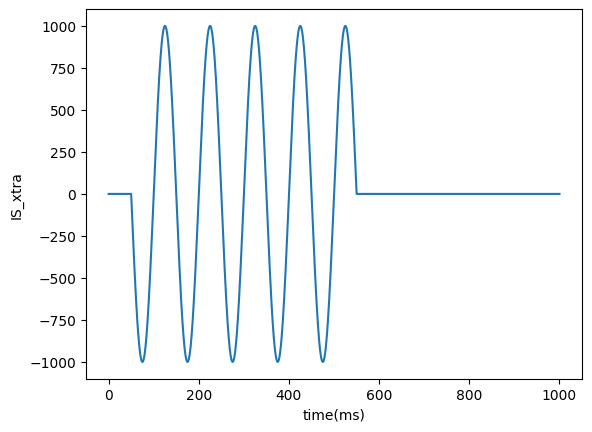

In [9]:
#plot is over time
plt.Figure()
plt.plot(t,is_xtra)
plt.xlabel("time(ms)")
plt.ylabel("IS_xtra")
plt.show()

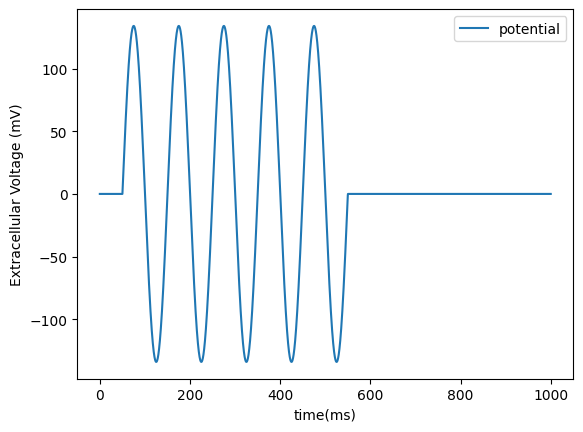

In [10]:
#plot extracellular voltage over time
#potential at the external surface of the soma
plt.Figure()
plt.plot(t,extracellular_v_soma,label="potential")
plt.xlabel("time(ms)")
plt.ylabel("Extracellular Voltage (mV)")
plt.legend()
plt.show()
# print(list(t))

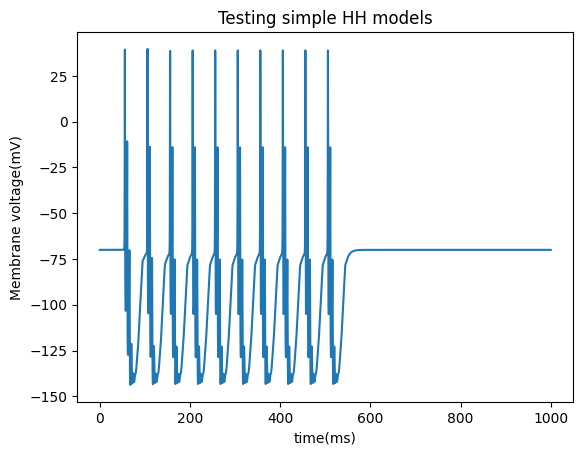

In [11]:
plt.Figure()
plt.plot(t,v)
plt.xlabel("time(ms)")
plt.ylabel("Membrane voltage(mV)")
plt.title("Testing simple HH models")
plt.show()

Vector[0]
[55.300000000099, 105.60000000009614, 155.60000000010112, 205.6000000001125, 255.70000000012388, 305.7000000001352, 355.7000000001466, 405.70000000015796, 455.7000000001693, 505.7000000001807]
22.202486678503966


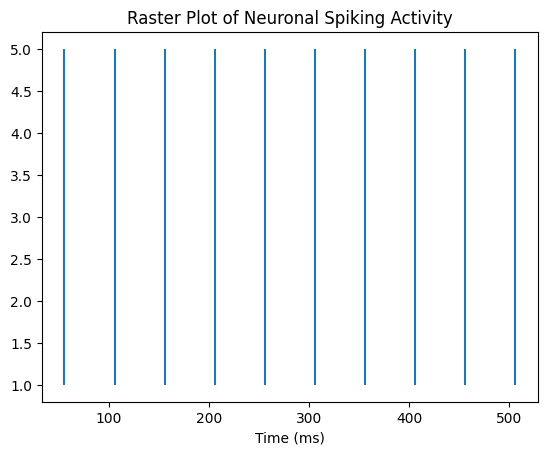

In [12]:
print(cell.spike_times)
spiketimes = cell.spike_times.to_python()
plt.Figure()
plt.vlines(spiketimes,1,5)
plt.xlabel('Time (ms)')
plt.title('Raster Plot of Neuronal Spiking Activity')

print(spiketimes)
if len(spiketimes)>0:
    time=spiketimes[-1]-spiketimes[0]
    freq=len(spiketimes)/time*1000
    print(freq)